# Bike Sharing Gowessantai Analisis Dashboard
- **Nama:** Fahri Febriandika Pamungkas
- **Email:** febrian2104@gmail.com
- **ID Dicoding:** fahri_febrian

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda harian dan bulanan selama tahun 2011 dan 2012?
- Bagaimana perbedaan jumlah pengguna sepeda pada hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [21]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [22]:
df_hour = pd.read_csv('dataset/hour.csv')
df_day = pd.read_csv('dataset/day.csv')

df_day.head() 
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [23]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'], errors='coerce')
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'], errors='coerce')

df_day.info() 
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Cleaning Data

In [24]:
df_day.isnull().sum(), df_hour.isnull().sum()

df_day.dropna(subset=['dteday', 'cnt'], inplace=True)
df_hour.dropna(subset=['dteday', 'cnt'], inplace=True)

## Exploratory Data Analysis (EDA)

### Analisis Pengguna Bulanan dan Harian (2011 dan 2012)

In [25]:
# Membuat kolom tahun dan bulan untuk analisis lebih mudah
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month

# Memvisualisasikan pengguna bulanan di tahun 2011 dan 2012
monthly_users = df_day.groupby([df_day['dteday'].dt.to_period('M')]).agg({'cnt': 'sum'}).reset_index()

# Menampilkan hasil agregasi untuk dilihat
monthly_users.head()

,dteday,cnt
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


## Visualization & Explanatory Analysis

### Pertanyaan 1:

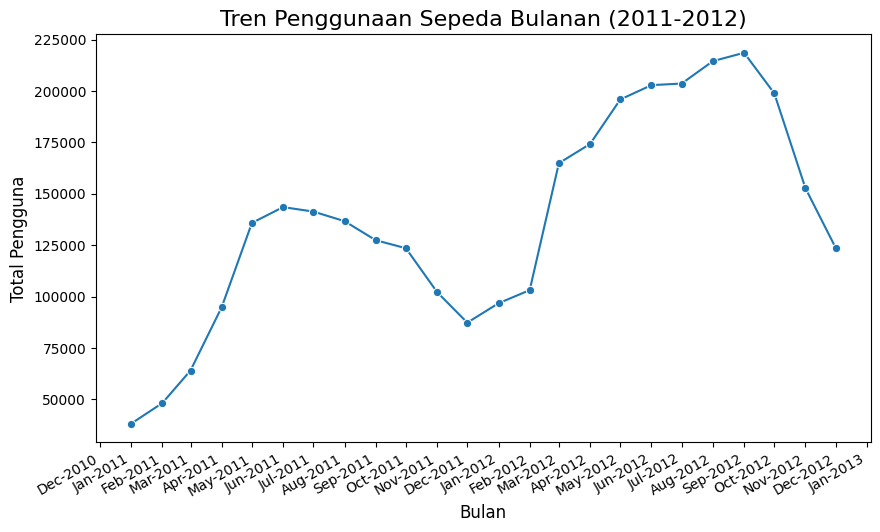

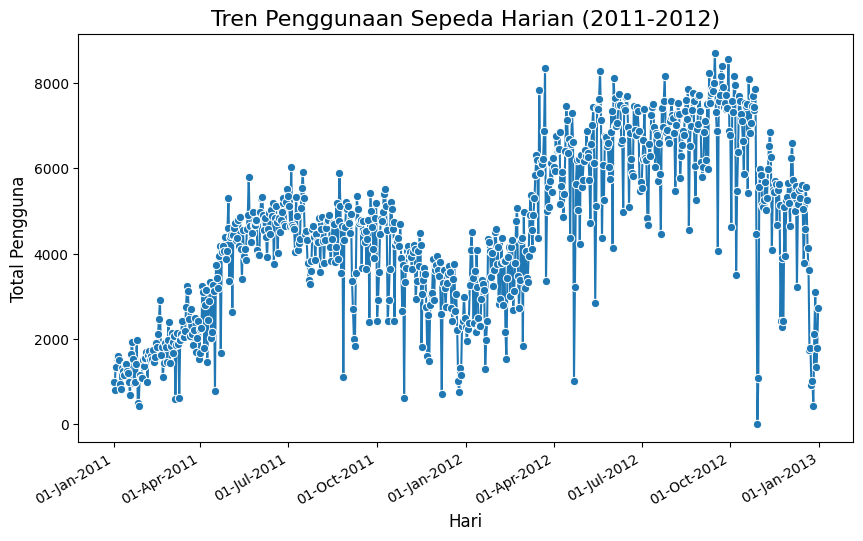

In [26]:
# Menambahkan kolom 'year' dan 'month' untuk memudahkan analisis
df_day['year'] = pd.to_datetime(df_day['dteday'], errors='coerce').dt.year
df_day['month'] = pd.to_datetime(df_day['dteday'], errors='coerce').dt.month

# Hapus data dengan nilai NaT (Not a Time) di 'dteday'
df_day.dropna(subset=['dteday'], inplace=True)

# Agregasi pengguna sepeda bulanan
monthly_users = df_day.groupby([df_day['year'], df_day['month']]).agg({'cnt': 'sum'}).reset_index()

# Menggabungkan kolom year dan month menjadi datetime
monthly_users['date'] = pd.to_datetime(monthly_users[['year', 'month']].assign(day=1))

# Visualisasi penggunaan sepeda bulanan
plt.close('all')  # Tutup plot yang terbuka sebelumnya
fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=monthly_users, x='date', y='cnt', marker='o', ax=ax1)
ax1.set_title('Tren Penggunaan Sepeda Bulanan (2011-2012)', fontsize=16)
ax1.set_xlabel('Bulan', fontsize=12)
ax1.set_ylabel('Total Pengguna', fontsize=12)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
fig1.autofmt_xdate()
plt.show()

# Agregasi pengguna sepeda harian
daily_users = df_day.groupby(df_day['dteday']).agg({'cnt': 'sum'}).reset_index()

# Visualisasi penggunaan sepeda harian
plt.close('all')  # Tutup plot yang terbuka sebelumnya
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=daily_users, x='dteday', y='cnt', marker='o', ax=ax2)
ax2.set_title('Tren Penggunaan Sepeda Harian (2011-2012)', fontsize=16)
ax2.set_xlabel('Hari', fontsize=12)
ax2.set_ylabel('Total Pengguna', fontsize=12)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
fig2.autofmt_xdate()
plt.show()

%matplotlib inline

### Pertanyaan 2:

#### Analisis Pengguna Hari Kerja vs Akhir Pekan

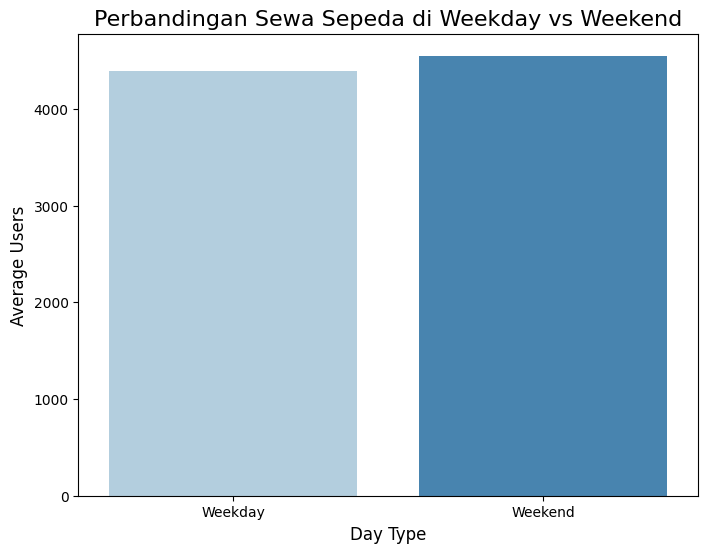

In [11]:
# Load the dataset
df_day = pd.read_csv('dataset/day.csv')  # Update this path if necessary

# Convert 'dteday' to datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'], errors='coerce')

# Filter the data (example filter, modify as needed)
start_date = df_day['dteday'].min()  # Define start_date for filtering
end_date = df_day['dteday'].max()    # Define end_date for filtering
filtered_df_day = df_day[(df_day['dteday'] >= start_date) & (df_day['dteday'] <= end_date)]

# Create 'day_of_week' column to indicate the day of the week (0 = Monday, 6 = Sunday)
filtered_df_day['day_of_week'] = filtered_df_day['dteday'].dt.dayofweek

# Create 'day_type' column to categorize weekdays and weekends
filtered_df_day['day_type'] = filtered_df_day['day_of_week'].apply(lambda x: 'Weekday' if x >= 5 else 'Weekend')

# Group by 'day_type' and calculate the average number of users
weekday_vs_weekend = filtered_df_day.groupby('day_type').agg({'cnt': 'mean'}).reset_index()

# Plot the comparison
fig3, ax3 = plt.subplots(figsize=(8, 6))
sns.barplot(data=weekday_vs_weekend, x='day_type', y='cnt', hue='day_type', palette="Blues", ax=ax3, legend=False)
ax3.set_title('Perbandingan Sewa Sepeda di Weekday vs Weekend', fontsize=16)
ax3.set_xlabel('Day Type', fontsize=12)
ax3.set_ylabel('Average Users', fontsize=12)

# Show the plot
plt.show()


## Conclusion

- Berdasarkan visualisasi, tren menunjukkan peningkatan penggunaan sepeda selama musim panas dan penurunan selama musim dingin.
- Bertentangan dengan kesimpulan sebelumnya, data menunjukkan bahwa penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, kemungkinan besar disebabkan oleh lalu lintas komuter pada hari kerja.